Name: Madhusudan Hasbe\
PRN: 22070126061\
TY AIML A3

# ASSIGNMENT 1

------------------

Implement the python program for different activation functions.

----------

# Activation Functions in Neural Networks
There are various activation functions used in neural networks, including Linear, Sigmoid, Tanh, ReLU, Leaky ReLU, and Softmax. Activation functions are essential for introducing non-linearity into neural networks, enabling them to learn and model complex data patterns. Each function has unique characteristics and applications, which are demonstrated through visualizations and code implementations in this python notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Linear Activation Function 
#### f(x)=x

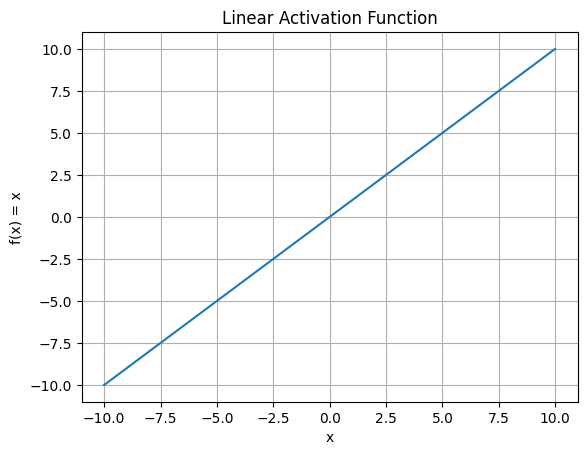

In [2]:
def linear(x):
    return x

# Plotting the linear function
x = np.linspace(-10, 10, 400)
y = linear(x)
plt.plot(x, y)
plt.title('Linear Activation Function')
plt.xlabel('x')
plt.ylabel('f(x) = x')
plt.grid()
plt.show()

### 2. Sigmoid Function
#### The sigmoid function maps any real-valued number into the range (0, 1).
#### y=1/(1+e^(-X))

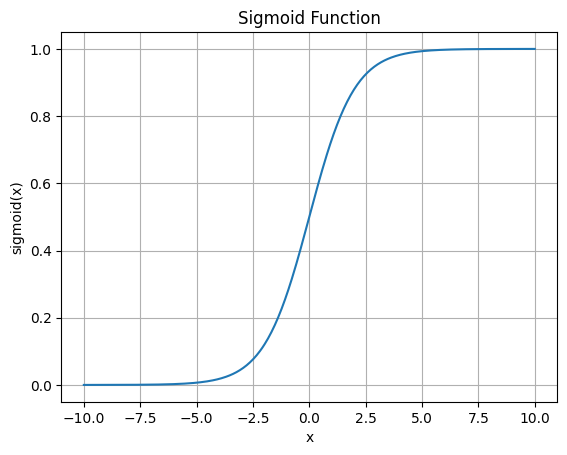

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Plotting the sigmoid function
x = np.linspace(-10, 10, 400)
y = sigmoid(x)
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.show()

### 3. Hyperbolic Tangent (tanh) Function
#### The tanh function maps any real-valued number into the range (-1, 1).
#### y=tan(X)

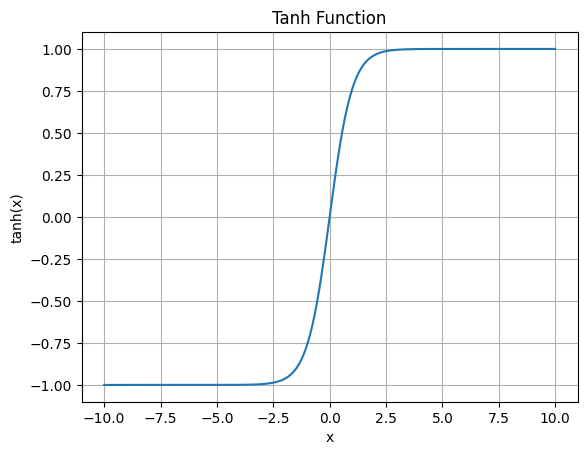

In [4]:
def tanh(x):
    return np.tanh(x)

# Plotting the tanh function
x = np.linspace(-10, 10, 400)
y = tanh(x)
plt.plot(x, y)
plt.title('Tanh Function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid()
plt.show()

### 4. ReLU (Rectified Linear Unit) Function
#### The ReLU function outputs the input directly if it is positive; otherwise, it outputs zero.
#### y=max(0,X)

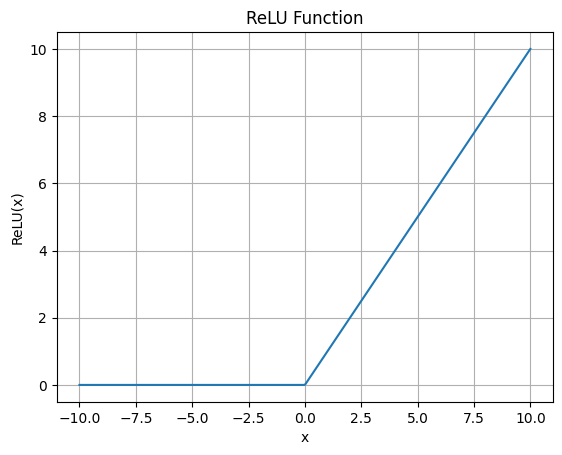

In [5]:
def relu(x):
    return np.maximum(0, x)

# Plotting the ReLU function
x = np.linspace(-10, 10, 400)
y = relu(x)
plt.plot(x, y)
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid()
plt.show()

### 5. Leaky ReLU Function
#### The Leaky ReLU function is an attempt to fix the "dying ReLU" problem by allowing a small, non-zero gradient when the input is negative

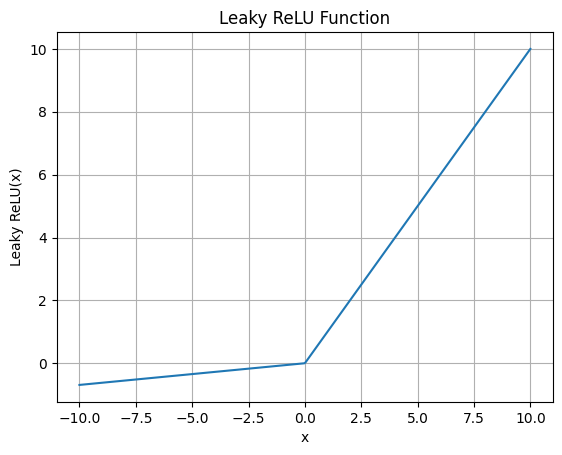

In [6]:
def leaky_relu(x, alpha=0.069):
    return np.where(x > 0, x, alpha * x)

# Plotting the Leaky ReLU function
x = np.linspace(-10, 10, 400)
y = leaky_relu(x)
plt.plot(x, y)
plt.title('Leaky ReLU Function')
plt.xlabel('x')
plt.ylabel('Leaky ReLU(x)')
plt.grid()
plt.show()

### 6. Softmax Function
#### The softmax function is often used in the output layer of a neural network to represent a probability distribution.
#### y=exp(X)/sum(exp(x))

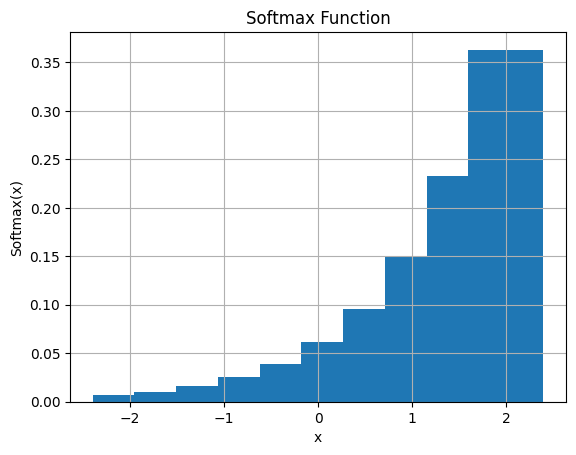

In [7]:
def softmax(x):
    exp_x = np.exp(x - np.max(x)) # Shift for numerical stability   
    return exp_x / exp_x.sum(axis=0)

# Plotting the softmax function
x = np.linspace(-2, 2, 10)
y = softmax(x)
plt.bar(x, y)
plt.title('Softmax Function')
plt.xlabel('x')
plt.ylabel('Softmax(x)')
plt.grid()
plt.show()

-----------

Implement the python program for building a simple NN from scratch (without Tensorflow and Keras).

-----------

# Neural Network Implementation from Scratch
This is an implementation of a simple neural network from scratch using NumPy. It has the essential components of a neural network, including initialization of weights and biases, forward propagation, backpropagation, and training. We test the network by solving a gate problem (eg. XOR gate) and thus this will help us gain insights into how neural networks learn and generalize from data.

In [12]:
import numpy as np

In [14]:
# Defining a class for the neural network
class NeuralNetworks:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights with random values
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

        # Initialize the biases with zeros
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    # Sigmoid activation function
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    # Derivative of the sigmoid function
    def sigmoid_derivative(self, x):
        return x*(1-x)
    
    # Feedforward process
    def feedforward(self, x):
        # Calculate hidden layer activation
        self.hidden_activation = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_activation)

        # Calculate output layer activation
        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_activation)

        return self.predicted_output
    
    # Backpropogation process
    def backward(self, x, y, learning_rate):
        # Compute the output layer error 
        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        # Compute the hidden layer error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        # Update weights and biases 
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis = 0, keepdims= 0) * learning_rate
        self.weights_input_hidden += np.dot(x.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis = 0, keepdims= 0) * learning_rate

    # Training
    def train(self, x, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.feedforward(x)
            self.backward(x, y, learning_rate)
            if epoch % 5000 == 0:
                loss = np.mean(np.square(y - output))
                print("Epoch:", {epoch}, "Loss:", {loss})

In [15]:
# Defining input and output data
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[1], [0], [0], [1]])

In [16]:
# Creating a neural network instance
nn = NeuralNetworks(input_size=2, hidden_size=4, output_size=1)

# Training the neural network
nn.train(x, y, epochs= 100000, learning_rate=0.1)

Epoch: {0} Loss: {0.25684408530259495}
Epoch: {5000} Loss: {0.006817948636360955}
Epoch: {10000} Loss: {0.001778418922458093}
Epoch: {15000} Loss: {0.0009400727073127588}
Epoch: {20000} Loss: {0.0006224461057343657}
Epoch: {25000} Loss: {0.0004596779740999537}
Epoch: {30000} Loss: {0.000361943243862569}
Epoch: {35000} Loss: {0.00029722256208020067}
Epoch: {40000} Loss: {0.00025141638100080243}
Epoch: {45000} Loss: {0.0002173981718407463}
Epoch: {50000} Loss: {0.0001911965776512692}
Epoch: {55000} Loss: {0.00017043108298776645}
Epoch: {60000} Loss: {0.000153591599872044}
Epoch: {65000} Loss: {0.00013967580382657363}
Epoch: {70000} Loss: {0.00012799326845838548}
Epoch: {75000} Loss: {0.00011805347729023593}
Epoch: {80000} Loss: {0.00010949869705852328}
Epoch: {85000} Loss: {0.00010206210828095502}
Epoch: {90000} Loss: {9.554078667065911e-05}
Epoch: {95000} Loss: {8.977774778814006e-05}


In [17]:
# Test the trained model
output = nn.feedforward(x)
print("Predictions after training:")
print(output)

Predictions after training:
[[0.99385298]
 [0.01049015]
 [0.00861559]
 [0.98920457]]


In [19]:
# Assuming a threshold of 0.5 for binary classification
predictions = np.round(output)  

# Calculate accuracy
accuracy = np.mean(predictions == y)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


We have got 100% accuracy in classifying the array with our Neural Network

-----------

Implement the python program for any dataset from kaggle from scratch (without Tensorflow and Keras).

--------

# Neural Network for Iris Dataset Classification
In this notebook, we show the implementation of a neural network from scratch using NumPy to classify the Iris dataset from Kaggle (or Scikit-learn datasets). The network consists of an input layer, a hidden layer, and an output layer, utilizing the sigmoid activation function to introduce non-linearity. It also has concepts such as forward propagation, backpropagation, and training, thus showing how neural networks generalize from training data.

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [7]:
# Defining a class for the neural network
class NeuralNetworks:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights with random values
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

        # Initialize the biases with zeros
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    # Sigmoid activation function
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    # Derivative of the sigmoid function
    def sigmoid_derivative(self, x):
        return x*(1-x)
    
    # Feedforward process
    def feedforward(self, x):
        # Calculate hidden layer activation
        self.hidden_activation = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_activation)

        # Calculate output layer activation
        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_activation)

        return self.predicted_output
    
    # Backpropogation process
    def backward(self, x, y, learning_rate):
        # Compute the output layer error 
        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        # Compute the hidden layer error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        # Update weights and biases 
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis = 0, keepdims= 0) * learning_rate
        self.weights_input_hidden += np.dot(x.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis = 0, keepdims= 0) * learning_rate

    # Training
    def train(self, x, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.feedforward(x)
            self.backward(x, y, learning_rate)
            if epoch % 5000 == 0:
                loss = np.mean(np.square(y - output))
                print("Epoch:", {epoch}, "Loss:", {loss})

In [8]:
# Load the Iris dataset
iris = load_iris()
x = iris.data
y = iris.target

# Doing one-hot encoding on target variable
y = np.eye(3)[y]

In [9]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating a neural network instance
nn = NeuralNetworks(input_size = x_train.shape[1], hidden_size = 4, output_size = 3)

# Training the neural network
nn.train(x_train, y_train, epochs = 100000, learning_rate = 0.01)

Epoch: {0} Loss: {0.284446352081132}
Epoch: {5000} Loss: {0.011520364828994973}
Epoch: {10000} Loss: {0.010703506904410375}
Epoch: {15000} Loss: {0.00954479013509202}
Epoch: {20000} Loss: {0.007935410924956355}
Epoch: {25000} Loss: {0.006940185359652845}
Epoch: {30000} Loss: {0.006442902498700641}
Epoch: {35000} Loss: {0.006173124935747319}
Epoch: {40000} Loss: {0.006008243968478693}
Epoch: {45000} Loss: {0.005899540076736087}
Epoch: {50000} Loss: {0.005824446467543654}
Epoch: {55000} Loss: {0.005770545117764302}
Epoch: {60000} Loss: {0.005730430919446464}
Epoch: {65000} Loss: {0.0056995839627586855}
Epoch: {70000} Loss: {0.005675172567189035}
Epoch: {75000} Loss: {0.0056553678643473035}
Epoch: {80000} Loss: {0.005638952544993657}
Epoch: {85000} Loss: {0.005625093570925024}
Epoch: {90000} Loss: {0.005613206459048971}
Epoch: {95000} Loss: {0.005602871770837873}


In [10]:
# Testing the trained model
predictions = nn.feedforward(x_test)
predictions = np.argmax(predictions, axis=1)
labels = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == labels)
print(f'Accuracy: {accuracy * 100}%')

Accuracy: 100.0%


We got 100% Accuracy by training our neural network on Iris Dataset!